![Astrofisica Computacional](../../../logo.png)

---
## 01. Introduction to Probability


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this worksheet, we introduce some basic aspects about probility. 

---

# Some Common Univariate Functions
 
## The Uniform Distribution

The **Uniform** distribution (*top-hat* or *box*) is defined as

\begin{equation}
p(x;\mu, W ) =  
\begin{cases}
\frac{1}{W} &\text{ for } \left| x- \mu \right| \leq \frac{W}{2}\\
0 &\text{ otherwise} .
\end{cases}
\end{equation}

The constant $W$ is the width of the box. Some well known results are:

* $\sigma = \frac{W}{\sqrt{12}} \sim 0.3 W$
* Skewness: $\Sigma = 0$
* Kurtosis: $K = -1.2$ (i.e. platykurtic)

We will use the implementation given in [scipy.stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Uniform distribution with left edge = 0 and width W = 2
uniform = stats.uniform(0,2)

# retrieve 10 random values from the distribution
uniform.rvs(10)

array([1.23505514, 1.65142373, 1.07917436, 1.38850846, 0.65330648,
       1.80215928, 0.0498571 , 0.50634694, 1.61043247, 1.20310141])

In [6]:
# Evaluate the pdf at one point, e.g. x=1
uniform.pdf(5.5)

0.0

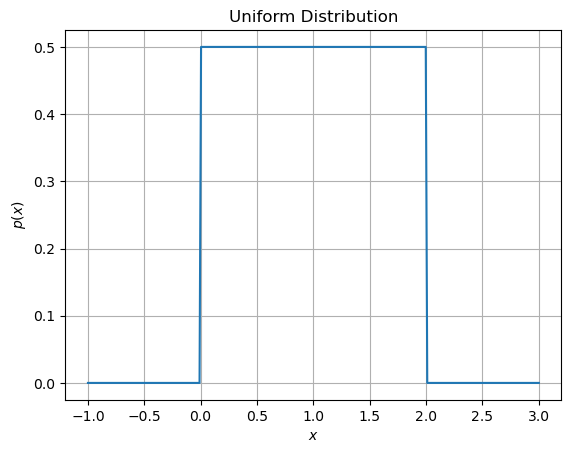

In [7]:
# Plot the uniform distribution
xrange= np.linspace(-1,3,300)

plt.figure()
plt.plot(xrange, uniform.pdf(xrange))
plt.title('Uniform Distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.grid()
plt.show()

In [8]:
def mean(h):
    from scipy.integrate import quad
    import numpy as np
    '''
    Arithmetic Mean or Expectation value
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    return quad(lambda x: x*h(x), -np.inf, np.inf)[0]

print('Arithmetic mean:', mean(uniform.pdf))

Arithmetic mean: 0.9999999999999969


In [9]:
def var(h):
    from scipy.integrate import quad
    import numpy as np
    '''
    Variance
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    mu = mean(h)
    return quad(lambda x: ((x - mu)**2)*h(x), -np.inf, np.inf)[0]

print('Variance:',var(uniform.pdf))

Variance: 0.3333333333333165


In [10]:
def std(h):
    from scipy.integrate import quad
    import numpy as np
    '''
    Standard Deviation
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    return np.sqrt(var(h))

print('Standard deviation:',std(uniform.pdf))

Standard deviation: 0.5773502691896112


In [11]:
def skew(h):
    from scipy.integrate import quad
    import numpy as np
    '''
    Skewness
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    mu = mean(h)
    sigma = std(h)
    return quad(lambda x: (((x - mu)/sigma)**3)*h(x), -np.inf, np.inf)[0]

print('Skewness:',skew(uniform.pdf))

Skewness: 1.8224795186178947e-14


In [12]:
def kurt(h):
    from scipy.integrate import quad
    import numpy as np
    '''
    Kurtosis
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    mu = mean(h)
    sigma = std(h)
    return quad(lambda x: (((x - mu)/sigma)**4)*h(x), -np.inf, np.inf)[0] - 3

print('Kurtosis:',kurt(uniform.pdf))

Kurtosis: -1.1999999999998026


These moments of the distribution can also be calculated using the method `.stats(moments='mvsk')`

In [13]:
mean0, var0, skew0, kurt0 = uniform.stats(moments='mvsk')

print('Arithmetic mean:',mean0)
print('Variance:',var0)
print('Skewness:',skew0)
print('Kurtosis:',kurt0)

Arithmetic mean: 1.0
Variance: 0.3333333333333333
Skewness: 0.0
Kurtosis: -1.2


---
## The Gaussian (normal) Distribution

The Gaussian (or normal) distribution is defined by

\begin{equation}
p(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[ -\frac{(x-\mu)^2}{2\sigma^2}\right]
\end{equation}

Note that this distribution incorporates explicitly the average $\mu$ and the standard deviation $\sigma$.

We will use the implementation given in [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [15]:
# Uniform distribution with mean = 0 and std = 1.5
gaussian = stats.norm(0,1.5)

# retrieve 10 random values from the distribution
gaussian.rvs(10)

array([ 1.71393156,  0.76140473,  0.43657834, -1.13489094, -0.73580114,
        1.63177684,  1.67834261, -1.27202084, -2.54972866, -1.83466566])

In [16]:
# Evaluate the pdf at one point, e.g. x=0
gaussian.pdf(0)

0.2659615202676218

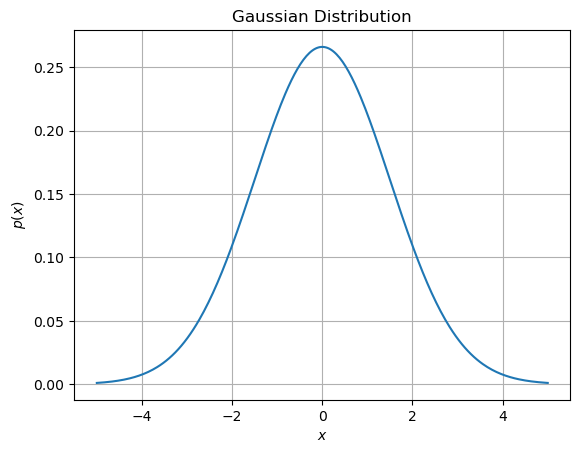

In [17]:
# Plot the uniform distribution
xrange= np.linspace(-5,5,300)

plt.figure()
plt.plot(xrange, gaussian.pdf(xrange))
plt.title('Gaussian Distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.grid()
plt.show()

The properties of this distribution are:

In [18]:
print('Arithmetic mean:',mean(gaussian.pdf))
print('Variance:',var(gaussian.pdf))
print('Standard deviation:',std(gaussian.pdf))
print('Skewness:',skew(gaussian.pdf))
print('Kurtosis:',kurt(gaussian.pdf))

Arithmetic mean: 0.0
Variance: 2.2500000000000004
Standard deviation: 1.5000000000000002
Skewness: 0.0
Kurtosis: 5.329070518200751e-15


As before, the moments of the distribution can also be calculated using the method `.stats(moments='mvsk')`

In [19]:
mean0, var0, skew0, kurt0 = gaussian.stats(moments='mvsk')

print('Arithmetic mean:',mean0)
print('Variance:',var0)
print('Skewness:',skew0)
print('Kurtosis:',kurt0)

Arithmetic mean: 0.0
Variance: 2.25
Skewness: 0.0
Kurtosis: 0.0


## The Binomial Distribution

The Binomial distribution describes a variable that can take only two discrete values, say $0$ or $1$. If the probability to obtain the number $1$ is $b$, the distribution of the discrete variable $k$ that measures how many times the result $1$ occurred in $N$ trials is given by the expression

\begin{equation}
p(k; b, N) = \frac{N!}{k! (N-k)!} b^k (1-b)^{N-k}
\end{equation}

The particular case $N=1$ is known as the *Bernoulli distribution*.

For the binomial distribution, the expected value of successes is $\bar{k} = bN$ and its standard deviation is $\sigma = \sqrt{Nb(1-b)}$.

We will use the implementation given in [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)


In [20]:
# Binomial distribution with N = 20 and b = 0.7
binom = stats.binom(20, 0.7)

# Retrieve ten random numbers form this distribution
binom.rvs(10)

array([13, 13, 12, 14, 12, 14, 14, 14,  9, 15])

In [28]:
# binomial distribution evaluated at k=10

binom.pmf(13)

0.16426198521723653

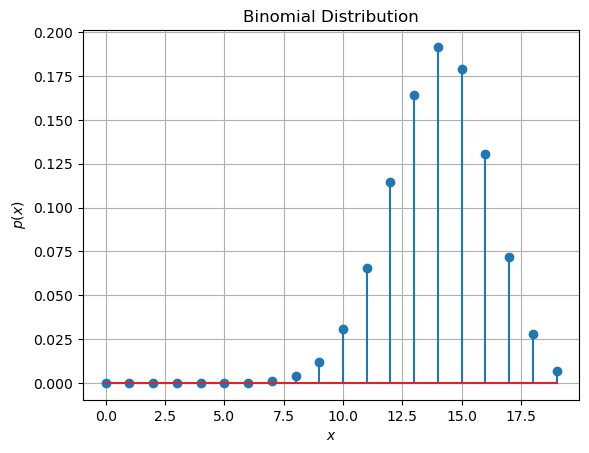

In [29]:
# Plot the uniform distribution
krange= range(0,20)

plt.figure()
plt.stem(krange, binom.pmf(krange))
plt.title('Binomial Distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.grid()
plt.show()

Since this is a discrete distribution, we must define the statistical properties again,

In [30]:
def meand(h):
    import numpy as np
    '''
    Arithmetic Mean or Expectation value
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    krange = range(0,100)
    return np.sum(krange*h(krange))/np.sum(h(krange))

print('Arithmetic mean:', meand(binom.pmf))

Arithmetic mean: 14.0


In [31]:
def vard(h):
    import numpy as np
    '''
    Variance
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    krange = range(0,100)
    mu = meand(h)
    return np.sum(((krange - mu)**2)*h(krange))/np.sum(h(krange))

print('Variance:',vard(binom.pmf))

Variance: 4.199999999999998


In [32]:
def stdd(h):
    import numpy as np
    '''
    Standard Deviation
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    return np.sqrt(vard(h))

print('Standard deviation:',stdd(binom.pmf))

Standard deviation: 2.0493901531919194


In [33]:
def skewd(h):
    import numpy as np
    '''
    Skewness
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    krange = range(0,100)
    N = len(krange)
    mu = meand(h)
    sigma = stdd(h)
    return sum((((krange - mu)/sigma)**3)*h(krange))/np.sum(h(krange))

print('Skewness:',skewd(binom.pmf))

Skewness: -0.1951800145897077


In [34]:
def kurtd(h):
    import numpy as np
    '''
    Kurtosis
    --------------------------------------------------
    Argument:
    h(x): probability density function
    --------------------------------------------------
    '''
    krange = range(0,100)
    mu = meand(h)
    sigma = stdd(h)
    return sum((((krange - mu)/sigma)**4)*h(krange))/np.sum(h(krange)) - 3

print('Kurtosis:',kurtd(binom.pmf))

Kurtosis: -0.061904761904761685


As before, the moments of the distribution can also be calculated using the method `.stats(moments='mvsk')`

In [35]:
mean0, var0, skew0, kurt0 = binom.stats(moments='mvsk')

print('Arithmetic mean:',mean0)
print('Variance:',var0)
print('Skewness:',skew0)
print('Kurtosis:',kurt0)

Arithmetic mean: 14.0
Variance: 4.200000000000001
Skewness: -0.19518001458970657
Kurtosis: -0.06190476190476188
